<a href="https://colab.research.google.com/github/uniquepupil/AIT-LOST-AND-FOUND-/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Stock Market Price Prediction**



In [ ]:
pip install pandas

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [ ]:
# Get historical data
ticker_symbol = "AAPL"  # Apple Inc.
stock_data = yf.download('AAPL', start='2010-01-01', end='2022-01-01')



[*********************100%%**********************]  1 of 1 completed


### **Understand Data**

In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409361,447610800
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.065674,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.038712,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.127579,62348900


In [ ]:
# Check the dimensions of the dataset
print('Dataset Shape:', stock_data.shape)

Dataset Shape: (3021, 6)


In [ ]:
# Check the data types of each column
print('Data Types:', stock_data.dtypes)

Data Types: Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
# Summary statistics
print('Summary Statistics:')
print(stock_data.describe())

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  3021.000000  3021.000000  3021.000000  3021.000000  3021.000000   
mean     42.698028    43.142652    42.260698    42.720728    40.474912   
std      38.047906    38.498218    37.621622    38.084410    38.114782   
min       6.870357     7.000000     6.794643     6.858929     5.806767   
25%      18.523571    18.651787    18.345358    18.537500    16.025826   
50%      28.264999    28.552500    27.992500    28.262501    25.774111   
75%      48.105000    48.615002    47.787498    48.185001    46.067322   
max     181.119995   182.130005   178.529999   180.330002   178.065689   

             Volume  
count  3.021000e+03  
mean   2.702590e+08  
std    2.259517e+08  
min    4.100000e+07  
25%    1.096348e+08  
50%    1.842204e+08  
75%    3.707320e+08  
max    1.880998e+09  


## Data Preprocessing

In [ ]:
# Check for missing values
missing_values = stock_data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Exploratory Data Analysis

In [ ]:
# Define features (X) and target (y)
X = stock_data[['Close']].values  # Closing price
y = stock_data['Close'].shift(-1).fillna(method='ffill').values  # Next day's closing price as target




In [ ]:
X

array([[  7.64321423],
       [  7.65642881],
       [  7.53464317],
       ...,
       [179.38000488],
       [178.19999695],
       [177.57000732]])

In [ ]:
y

array([  7.65642881,   7.53464317,   7.52071381, ..., 178.19999695,
       177.57000732, 177.57000732])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train


array([[23.56749916],
       [11.3571434 ],
       [12.96892929],
       ...,
       [23.37999916],
       [32.19749832],
       [15.89678574]])

In [ ]:
# X_test


array([[ 28.98999977],
       [ 20.41857147],
       [ 12.50535679],
       [ 11.17142868],
       [  7.9375    ],
       [ 14.76607132],
       [ 18.30678558],
       [ 19.14607048],
       [142.02000427],
       [129.03999329],
       [ 25.65999985],
       [149.80000305],
       [ 29.00499916],
       [ 27.62999916],
       [ 12.30571365],
       [ 21.7067852 ],
       [ 12.16071415],
       [  7.96500015],
       [109.66500092],
       [ 14.58678627],
       [ 49.25      ],
       [130.21000671],
       [ 38.61999893],
       [ 79.71250153],
       [ 25.375     ],
       [ 14.90785694],
       [ 54.17499924],
       [  9.31535721],
       [ 32.12749863],
       [ 26.47999954],
       [ 10.39857101],
       [ 12.05178642],
       [ 81.27999878],
       [119.38999939],
       [ 32.63999939],
       [ 92.84500122],
       [ 38.52999878],
       [ 26.77750015],
       [ 35.15999985],
       [ 66.54250336],
       [ 39.96500015],
       [  8.55500031],
       [ 22.28607178],
       [  9

In [ ]:
# y_train


array([23.42499924, 11.05321407, 12.79642868, ..., 23.37000084,
       32.60499954, 15.65928555])

In [ ]:
# y_test

array([ 29.29000092,  20.72571373,  12.38392925,  11.366786  ,
         8.02678585,  14.71928596,  18.30392838,  19.16464233,
       144.57000732, 134.17999268,  25.4375    , 148.96000671,
        29.15250015,  27.37249947,  12.18535709,  21.98928642,
        11.90357113,   8.02999973, 110.0625    ,  15.07142925,
        50.02500153, 126.84999847,  38.36999893,  80.36250305,
        25.75250053,  14.82321358,  55.89749908,   9.42678642,
        32.40499878,  26.47750092,  10.24499989,  12.19285679,
        80.58000183, 118.02999878,  32.15999985,  92.61499786,
        38.45249939,  27.49749947,  35.22000122,  71.33499908,
        40.36750031,   8.59285736,  22.69214249,   9.35178566,
        13.61857128, 124.27999878,  16.31535721,   9.57357121,
        15.00178623,  28.32500076,  79.52749634,  11.77035713,
        38.26750183,  29.36750031,  12.00464344,  51.77750015,
       136.33000183, 131.78999329,   7.65642881,  16.74392891,
        46.29000092,  28.54500008,  38.33499908, 126.90

In [ ]:
linear_reg = LinearRegression()
svm = SVR()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

models = {
    'Linear Regression': linear_reg,
    'SVR': svm,
    'Random Forest': random_forest
}


Linear Regression - Root Mean Squared Error: 1.1812289899509276


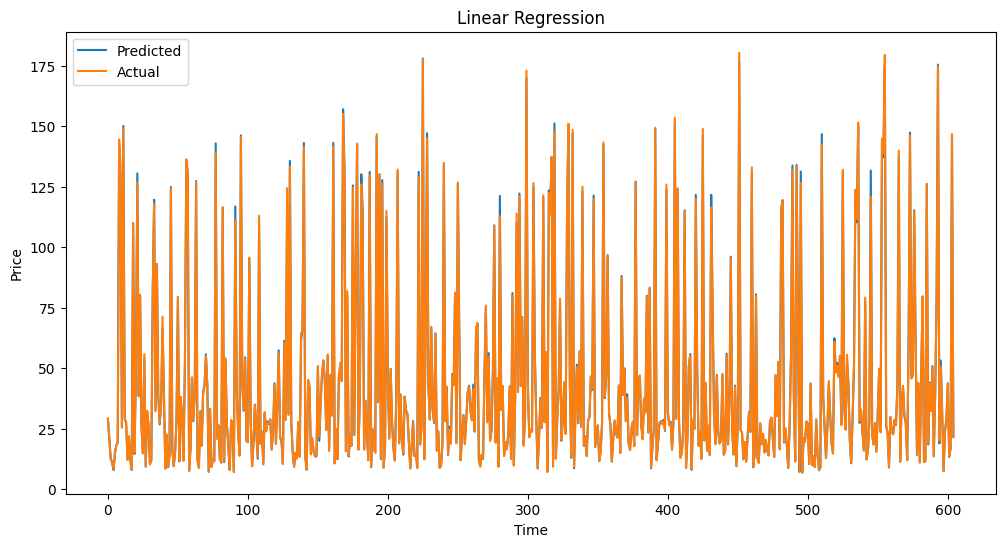

SVR - Root Mean Squared Error: 4.243143519473352


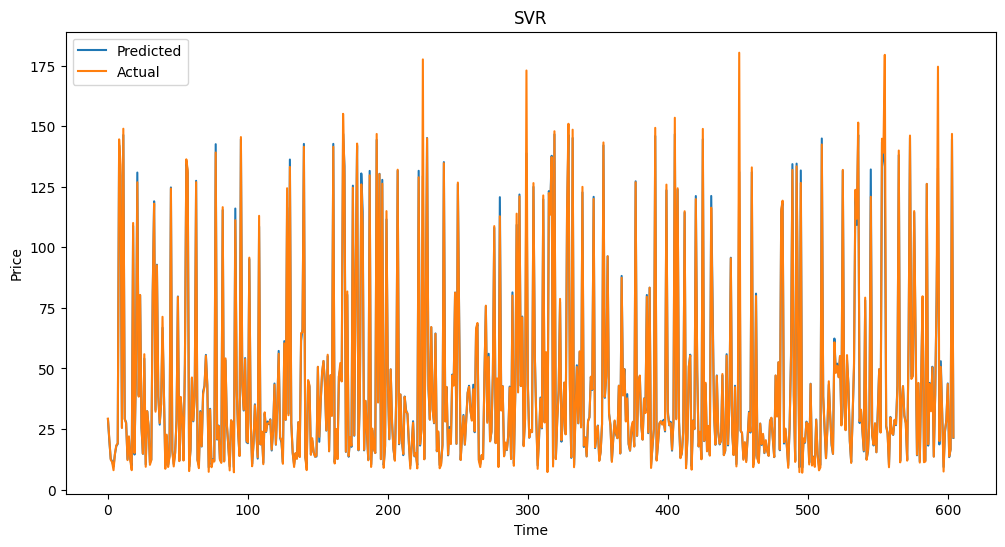

Random Forest - Root Mean Squared Error: 1.4773402568219294


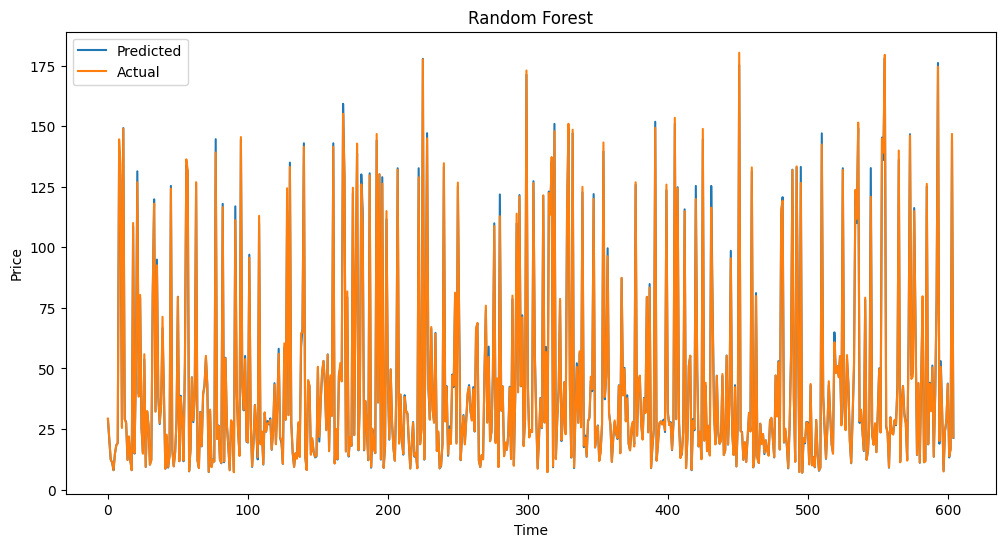

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"{name} - Root Mean Squared Error: {rmse}")

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(predictions, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(name)
    plt.legend()
    plt.show()


Linear Regression - Root Mean Squared Error: 1.1812289899509276


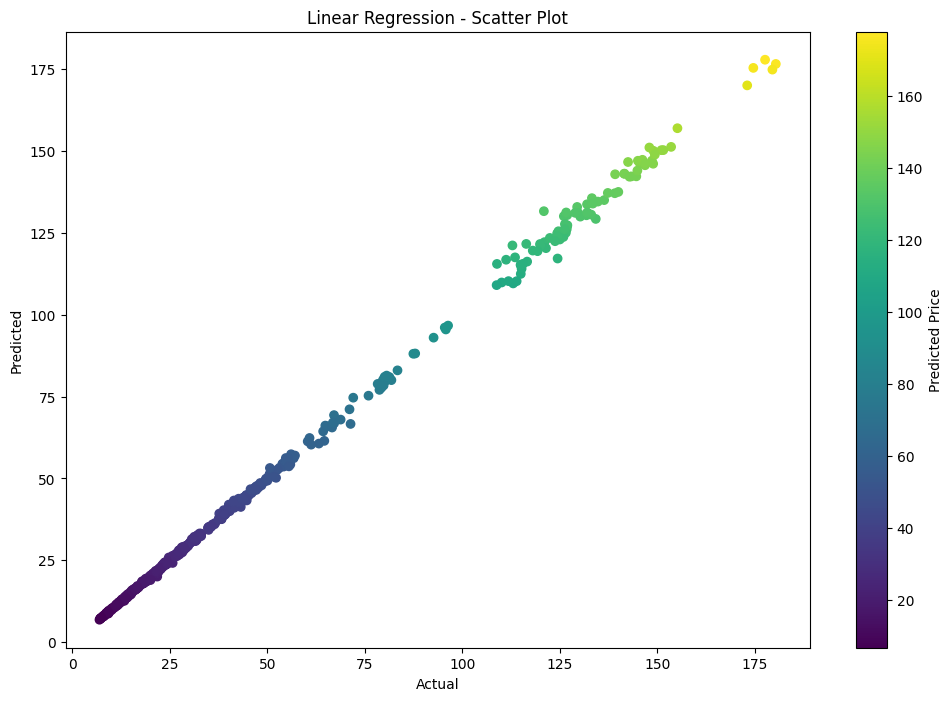

SVR - Root Mean Squared Error: 4.243143519473352


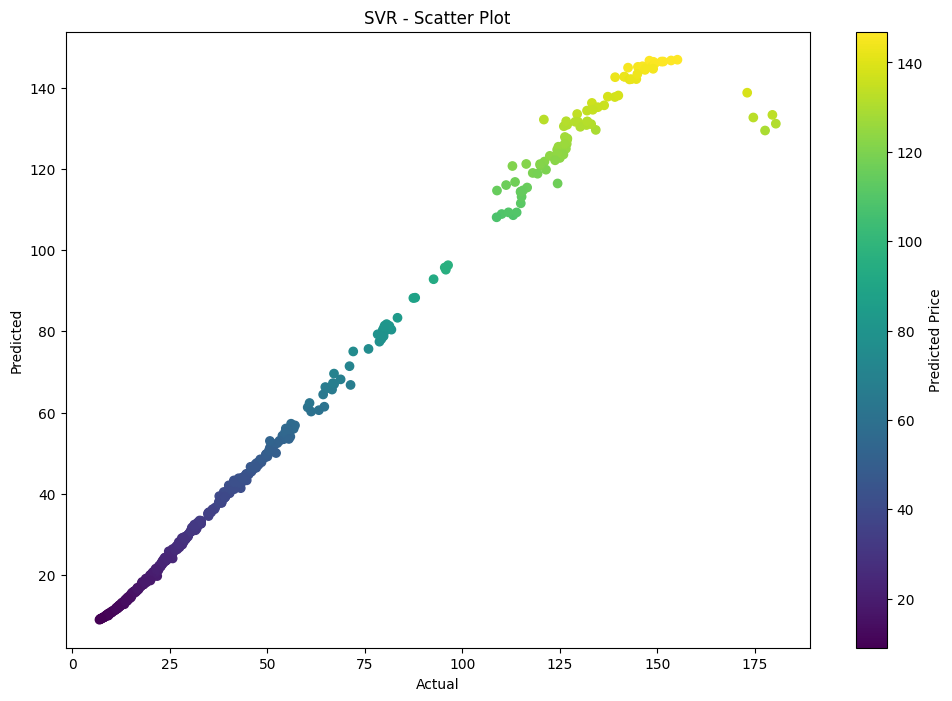

Random Forest - Root Mean Squared Error: 1.4773402568219294


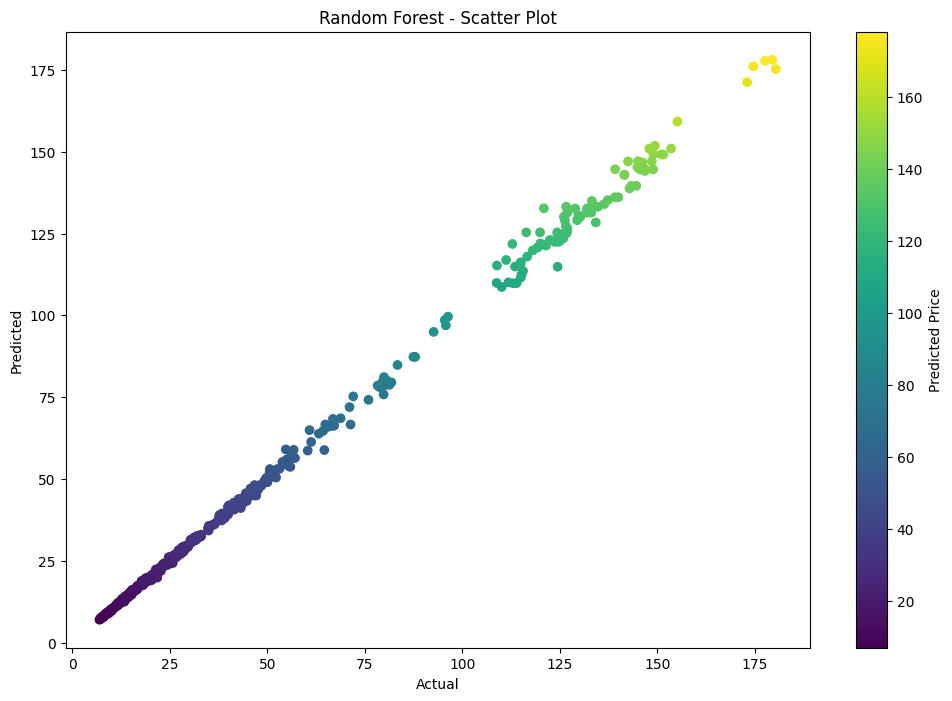

In [ ]:
  for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"{name} - Root Mean Squared Error: {rmse}")
  # Scatter plot

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(y_test, predictions, c=predictions, cmap='viridis')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(name + ' - Scatter Plot')
    plt.colorbar(scatter, label='Predicted Price')
    plt.show()

In [ ]:
class CombinedModel:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models.values():
            model.fit(X, y)

    def predict(self, X):
        predictions = []
        for model in self.models.values():
            predictions.append(model.predict(X))
        # Take the average of predictions
        avg_predictions = np.mean(predictions, axis=0)
        return avg_predictions



In [ ]:
# Create the combined model
combined_model = CombinedModel(models)



In [ ]:
# Train the combined model
combined_model.fit(X_train, y_train)



In [ ]:
# Predict using the combined model
combined_predictions = combined_model.predict(X_test)



In [ ]:
# Calculate RMSE for the combined model
combined_rmse = np.sqrt(mean_squared_error(y_test, combined_predictions))
print("Combined Model (Average) - Root Mean Squared Error:", combined_rmse)



Combined Model (Average) - Root Mean Squared Error: 1.895958917887158


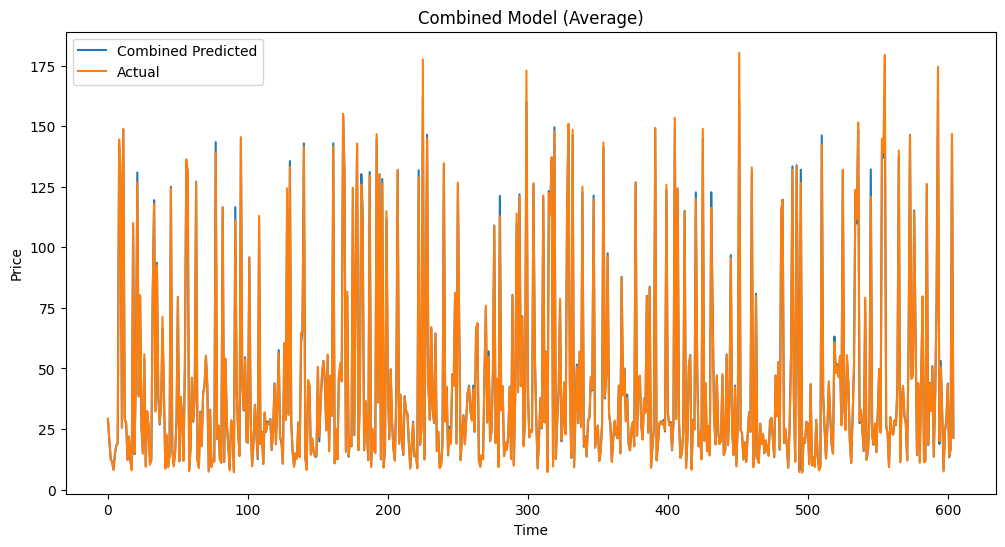

In [ ]:
# Plot predictions for the combined model
plt.figure(figsize=(12, 6))
plt.plot(combined_predictions, label='Combined Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Combined Model (Average)')
plt.legend()
plt.show()
